# Project Title: 
Telecommunications Customer Churn Prediction Analysis

# Business Understanding

## 1. Introduction
This project aims to assist a telecom company in understanding their data and predicting customer churn. The company has provided access to three different datasets: the first dataset with 3000 records stored in a remote Microsoft SQL Server database, the second dataset with 2000 records stored on OneDrive, and the third dataset hosted on a GitHub repository.

### 1.1. Objectives
Understand the data: Our first objective is to provide insights into the telecom company's data, including customer demographics, services availed, and payment details. This understanding will enable the company to make informed business decisions.

Find the lifetime value of each customer: By analyzing the data, we aim to identify factors that influence the rate at which customers churn. Understanding customer behavior and identifying key predictors will help the telecom company estimate the lifetime value of each customer.

Predict customer churn: The primary objective is to develop a predictive model that accurately determines whether a customer is likely to churn or not. We will employ machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to build a model that effectively predicts customer churn.

### 1.2. Methodology
To achieve our objectives, we will follow the CRISP-DM framework, which consists of the following steps:

Data exploration: We will thoroughly explore the datasets to gain insights into the available variables, their distributions, and relationships. This step will provide us with an initial understanding of the data and help identify any data quality issues.

Missing value computations: We will identify missing values in the datasets and decide on an appropriate strategy for handling them. This may involve imputing missing values or removing data points with missing values.

Feature engineering: We will perform feature engineering to transform and create new variables that can potentially improve the predictive power of our models. This step may include encoding categorical variables, scaling numerical variables, or creating interaction terms.

Model development: We will utilize various machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to develop predictive models for customer churn. We will train the models on a subset of the data and evaluate their performance using appropriate metrics.

Model evaluation and interpretation: We will evaluate the trained models using evaluation metrics such as accuracy, precision, recall, and F1-score. Additionally, we will interpret the models to understand the factors driving customer churn and their relative importance.

Model optimization and hyperparameter tuning: We will fine-tune the models by optimizing their hyperparameters to improve their performance. This step may involve techniques like grid search or random search to find the optimal combination of hyperparameters.

By following this methodology, we aim to provide valuable insights to the telecom company and develop a reliable predictive model for customer churn.

# Load Datasets

## Installations

In [1]:
# %pip install pyodbc
# %pip install openpyxl

## Load first dataset from SQL database

In [2]:
# Import necessary libraries
import pyodbc
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Establish a connection
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'

# Create the connection string using the ODBC driver format
conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Establish the connection using the connection string
conn = pyodbc.connect(conn_str)

In [4]:
# Query the database to retrieve the data
query = 'SELECT TOP 3000 * FROM LP2_Telco_churn_first_3000'
df_db = pd.read_sql(query, conn)

In [5]:
# Close connection
conn.close()

In [6]:
# Display the dataframe
df_db.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
# Display the dataframe
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


## Load second dataset (excelfile)

In [8]:
# Read the excel file into a pandas dataframe
df_excel = pd.read_excel('Telco-churn-second-2000.xlsx')

# Display the dataframe
df_excel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [9]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


## Load third dataset (csv file)

In [10]:
# Read third dataset
df_csv = pd.read_csv('LP2_Telco-churn-last-2000.csv')

# Display the dataframe
df_csv.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


## Organize the Datasets into Train and Test

### Train Dataset

In [11]:
# Train data is the 1st Dataset from the SQL Server and the 3rd Dataset from the CSV file.
# Concat the two files into 1 dataset
train_df = pd.concat([df_db, df_csv])
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
# Save the train dataset in a new csv file
train_df.to_csv('Train_Data.csv')

### Test Dataset

In [13]:
# The Test dataset is the 2nd Dataset from the Excel File 
test_df = df_excel

# Questions and Hypothesis

## Hypothesis

H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their 
demographics, services, and payment methods.

H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

## Questions
1. Is there a relationship between the monthly charges and the likelihood of churn?
2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?
3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?
4. How does the churn rate vary based on the customers' gender?
5. Does the presence of a partner influence the likelihood of churn?
6. Is there a correlation between the tenure of customers and their churn rate?

# Data Exploration

### Explore The Train and Test Datasets

#### a. Column Information of The Datasets

In [14]:
# Train Dataset Column information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [15]:
# Test Dataset Column information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


#### b. The Shape of The Datasets

In [16]:
# Check the shape of the train dataframe
train_df.shape

(5043, 21)

In [17]:
# Check the shape of the test dataframe
test_df.shape

(2000, 20)

#### c. The Unique Values of The Datasets

In [18]:
# check unique values of each column
for column in train_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, train_df[column].unique()))
    print('==='*15)

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [False True]
Column: Partner - Unique Values: [True False 'No' 'Yes']
Column: Dependents - Unique Values: [False True 'No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: [False True 'Yes' 'No']
Column: MultipleLines - Unique Values: [None False True 'No' 'No phone service' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: [True False None 'No' 'Yes' 'No internet service']
Column:

In [19]:
# check unique values of each column
for column in test_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, test_df[column].unique()))
    print('==='*15)

Column: customerID - Unique Values: ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
Column: gender - Unique Values: ['Male' 'Female']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['No' 'Yes']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
Column: PhoneService - Unique Values: ['Yes' 'No']
Column: MultipleLines - Unique Values: ['Yes' 'No' 'No phone service']
Column: InternetService - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: OnlineSecurity - Unique Values: ['No' 'No internet service' 'Yes']
Column: OnlineBackup - Unique Values: ['No' 'No internet service' 'Yes']
Column: DeviceProtection - Unique Values: ['No' 'No internet service' 'Yes']
Column: TechSuppor

#### d. The Summary Statistics of The Datasets

In [20]:
# Summary statistics of train_db to get insights into the distribution and basic characteristics of the numerical variables
train_df.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


In [21]:
# Summary statistics of test_df to get insights into the distribution and basic characteristics of the numerical variables
test_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325
std,0.368084,24.632677,30.136858
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,34.250000
50%,0.000000,27.000000,69.800000
75%,0.000000,55.000000,89.275000
max,1.000000,72.000000,118.750000


#### e. Checking for Missing Values in The Datasets

In [22]:
# Handling missing values
train_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [23]:
# Handling missing values
test_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

#### f. Checking for Duplicate Values of The Datasets

In [24]:
# Checking for duplicates in train_df
train_duplicates = train_df.duplicated().sum()
train_duplicates

0

In [25]:
# Checking for duplicates in test_df
test_duplicates = test_df.duplicated().sum()
test_duplicates

0

# Data Cleaning

In [26]:
# Handling the issues we identified earlier during data exploration

## a. Dropping Unwanted Columns

In [27]:
#The customerID column has no use in explaining whether or not the customer will churn.
# drop the customerID column from the train dataset
train_df.drop(columns='customerID', inplace=True)
train_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
# drop the customerID column from the train dataset
test_df.drop(columns='customerID', inplace=True)
test_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

## b. Data Transformation

### i. Standardizing the 'SeniorCitizen' Column

In [29]:
# Standardize 'SeniorCitizen' column
train_df['SeniorCitizen'] = train_df['SeniorCitizen'].replace({False: 0, True: 1}).astype(int)

# Standardize 'Partner' and 'Dependents' columns
train_df['Partner'] = train_df['Partner'].replace({False: 'No', True: 'Yes'})
train_df['Dependents'] = train_df['Dependents'].replace({False: 'No', True: 'Yes'})

# Standardize 'PhoneService' column
train_df['PhoneService'] = train_df['PhoneService'].replace({False: 'No', True: 'Yes'})

# Standardize 'MultipleLines' column
train_df['MultipleLines'] = train_df['MultipleLines'].replace({False: 'No', True: 'Yes', 'No phone service': 'No', None: 'No'})
test_df['MultipleLines'] = test_df['MultipleLines'].replace({False: 'No', True: 'Yes', 'No phone service': 'No', None: 'No'})

# Standardize 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' columns
# Train dataset
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].replace({False: 'No', True: 'Yes', 'No internet service': 'No', None: 'No' })
train_df['OnlineBackup'] = train_df['OnlineBackup'].replace({False: 'No', True: 'Yes', 'No internet service': 'No',  None: 'No'})
train_df['DeviceProtection'] = train_df['DeviceProtection'].replace({False: 'No', True: 'Yes', 'No internet service': 'No',  None: 'No'})
train_df['TechSupport'] = train_df['TechSupport'].replace({False: 'No', True: 'Yes', 'No internet service': 'No',  None: 'No'})
train_df['StreamingTV'] = train_df['StreamingTV'].replace({False: 'No', True: 'Yes', 'No internet service': 'No',  None: 'No'})
train_df['StreamingMovies'] = train_df['StreamingMovies'].replace({False: 'No', True: 'Yes', 'No internet service': 'No',  None: 'No'})


# Test dataset
test_df['OnlineSecurity'] = test_df['OnlineSecurity'].replace({False: 'No', True: 'Yes', 'No internet service': 'No', None: 'No'})
test_df['OnlineBackup'] = test_df['OnlineBackup'].replace({False: 'No', True: 'Yes', 'No internet service': 'No', None: 'No'})
test_df['DeviceProtection'] = test_df['DeviceProtection'].replace({False: 'No', True: 'Yes', 'No internet service': 'No', None: 'No'})
test_df['TechSupport'] = test_df['TechSupport'].replace({False: 'No', True: 'Yes', 'No internet service': 'No', None: 'No'})
test_df['StreamingTV'] = test_df['StreamingTV'].replace({False: 'No', True: 'Yes', 'No internet service': 'No', None: 'No'})
test_df['StreamingMovies'] = test_df['StreamingMovies'].replace({False: 'No', True: 'Yes', 'No internet service': 'No', None: 'No'})

# Standardize 'PaperlessBilling' column
train_df['PaperlessBilling'] = train_df['PaperlessBilling'].replace({False: 'No', True: 'Yes'})


train_df['Churn'] = train_df['Churn'].replace({'No': False, None: False, 'Yes': True})

In [30]:
# check unique values of each column
for column in train_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, train_df[column].unique()))
    print('==='*15)

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes']
Column: OnlineBackup - Unique Values: ['Yes' 'No']
Column: DeviceProtection - Unique Values: ['No' 'Yes']
Column: TechSupport - Unique Values: ['No' 'Yes']
Column: StreamingTV - Unique Values: ['No' 'Yes']
Column: StreamingMovies - Unique Values: ['No' 'Yes']
Column: Contract - Unique Values: ['Month-to-month' 'One year' 'Two ye

In [31]:
# check unique values of each column
for column in test_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, test_df[column].unique()))
    print('==='*15)

Column: gender - Unique Values: ['Male' 'Female']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['No' 'Yes']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
Column: PhoneService - Unique Values: ['Yes' 'No']
Column: MultipleLines - Unique Values: ['Yes' 'No']
Column: InternetService - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: OnlineSecurity - Unique Values: ['No' 'Yes']
Column: OnlineBackup - Unique Values: ['No' 'Yes']
Column: DeviceProtection - Unique Values: ['No' 'Yes']
Column: TechSupport - Unique Values: ['No' 'Yes']
Column: StreamingTV - Unique Values: ['Yes' 'No']
Column: StreamingMovies - Unique Values: ['No' 'Yes']
Column: Contract - Unique Values: ['Month-to-month' 'One year' 'Two ye

### i. Removing 'automatic' from Payment Method names

In [32]:
# Remove 'automatic' from payment method names in the train dataset
train_df['PaymentMethod'] = train_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# Unique elements of the 'PaymentMethod' column after the modification 
train_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [33]:
# Remove 'automatic' from payment method names in the test dataset
test_df['PaymentMethod'] = test_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# Unique elements of the 'PaymentMethod' column after the modification 
test_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'],
      dtype=object)

### ii. Transforming the 'TotalCharges' column into a numeric data type

In [34]:
# Transform the 'TotalCharges' column in the train dataset into a numeric data type
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

#confirm the datatype
train_df['TotalCharges'].dtype

dtype('float64')

In [35]:
# Check for null values the column
train_df['TotalCharges'].isnull().sum()

8

In [36]:
# Null observations of the column
train_df[train_df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.549999,NaN,False
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.250000,NaN,False
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,False
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.750000,NaN,False
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.049999,NaN,False
218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.700000,NaN,False
1670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,False
1754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer,61.900000,NaN,False


In [37]:
# Transform the 'TotalCharges' column in the test dataset into a numeric data type
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

#confirm the datatype
test_df['TotalCharges'].dtype

dtype('float64')

In [38]:
# Check for null values the  column
test_df['TotalCharges'].isnull().sum()

3

In [39]:
# Null observations of the column
test_df[test_df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN
826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN
1380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN


In [40]:
# Drop observations with null values in 'TotalCharges' column from train dataset
train_df = train_df.dropna(subset=['TotalCharges'])

In [41]:
# Drop observations with null values in 'TotalCharges' column from test dataset
test_df = test_df.dropna(subset=['TotalCharges'])

# Univariate Analysis

In [42]:
# Calculate the normalized value counts of 'Churn' in the training dataset
train_df['Churn'].value_counts(normalize=True)

False    0.734657
True     0.265343
Name: Churn, dtype: float64

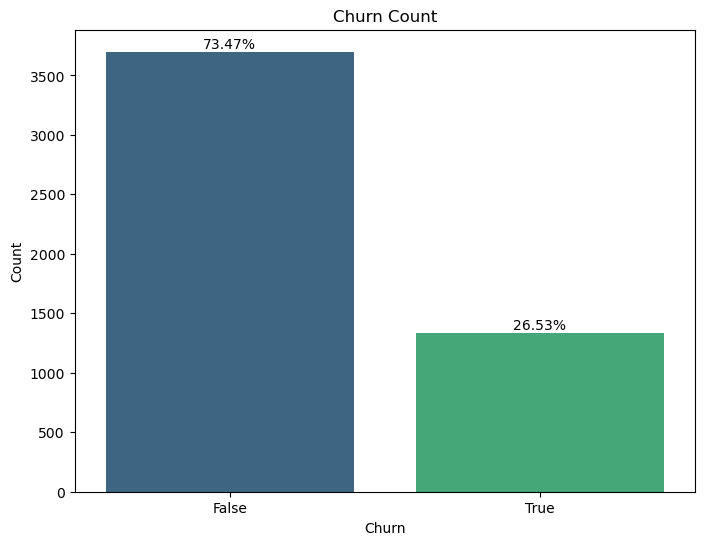

In [43]:
# Create a countplot to visualize the distribution of 'Churn' in the training dataset
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=train_df, palette='viridis') 
plt.xlabel('Churn') 
plt.ylabel('Count') 
plt.title('Churn Count') 

# Calculate the percentages
total = len(train_df['Churn'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
plt.show()

Approximately 26.53% of the total customers have churned.

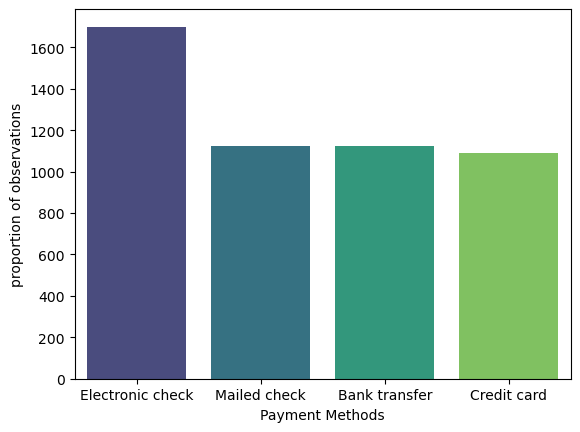

In [44]:
sns.countplot(x='PaymentMethod',  data=train_df, palette='viridis') 
plt.xlabel('Payment Methods')
plt.ylabel('proportion of observations')
plt.show()

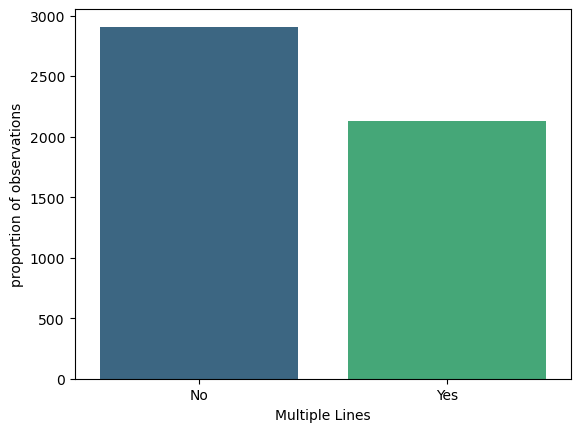

In [45]:
sns.countplot(x='MultipleLines',  data=train_df, palette='viridis') 
plt.xlabel('Multiple Lines')
plt.ylabel('proportion of observations')
plt.show()

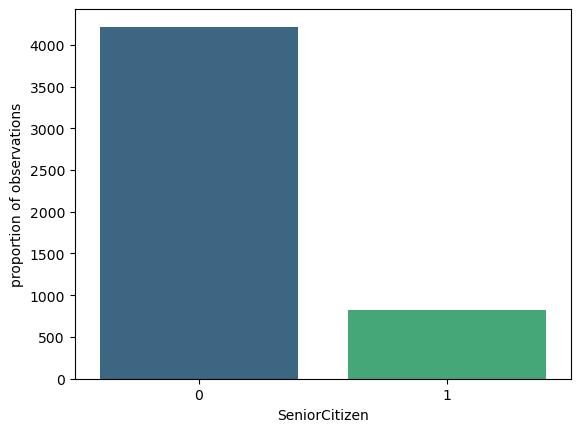

In [46]:
sns.countplot(x='SeniorCitizen',  data=train_df, palette='viridis') 
plt.xlabel('SeniorCitizen')
plt.ylabel('proportion of observations')
plt.show()

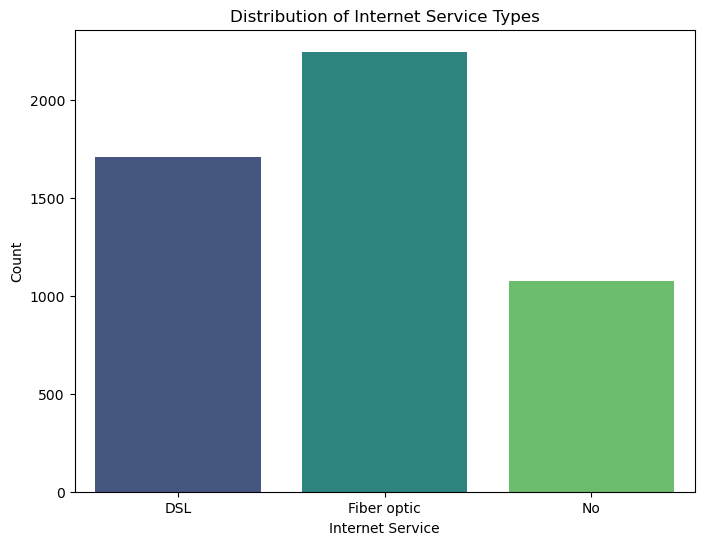

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=train_df, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service Types')
plt.show()

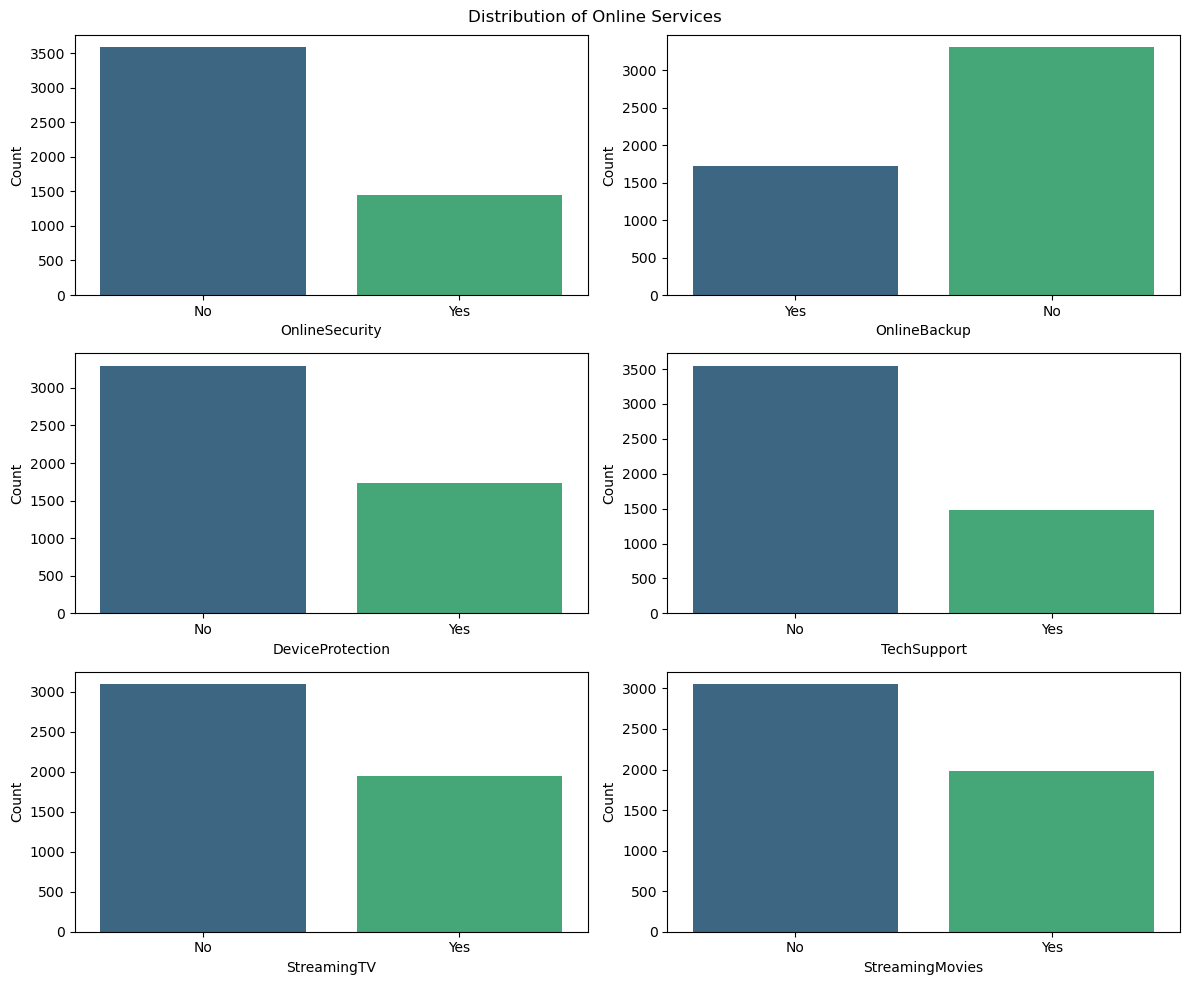

In [48]:
# Distributiom of online services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
plt.figure(figsize=(12, 10))
for i, service in enumerate(services):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=service, data=train_df, palette='viridis')
    plt.xlabel(service)
    plt.ylabel('Count')
plt.suptitle('Distribution of Online Services')
plt.tight_layout()
plt.show()

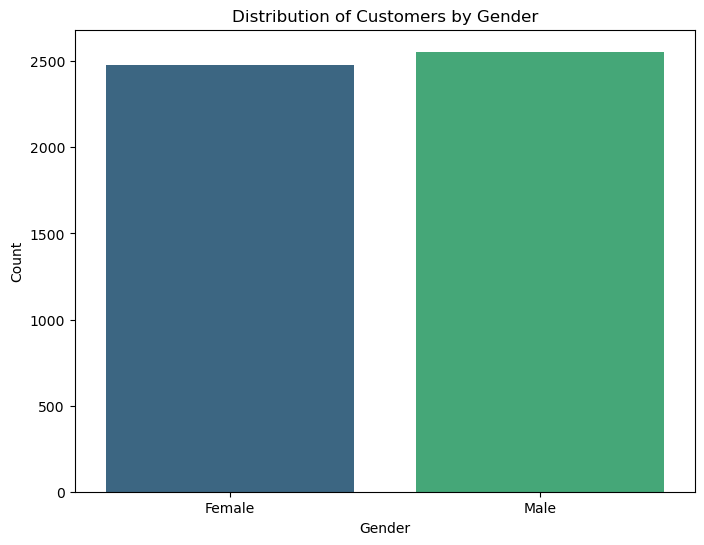

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=train_df, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Customers by Gender')
plt.show()

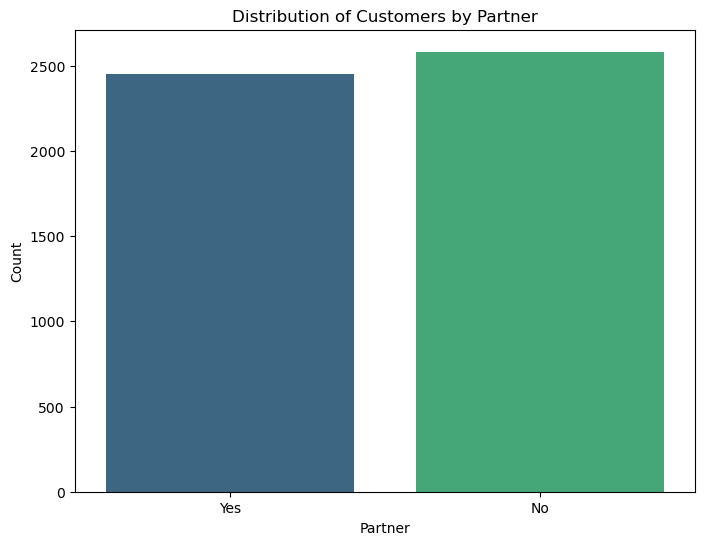

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', data=train_df, palette='viridis')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Distribution of Customers by Partner')
plt.show()

The majority of customers do not have a partner, while a smaller proportion of customers have a partner.

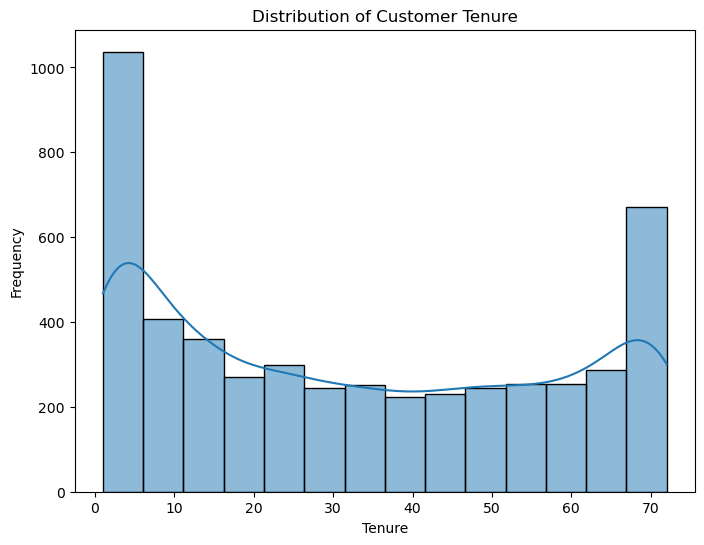

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['tenure'], kde=True)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Tenure')
plt.show()

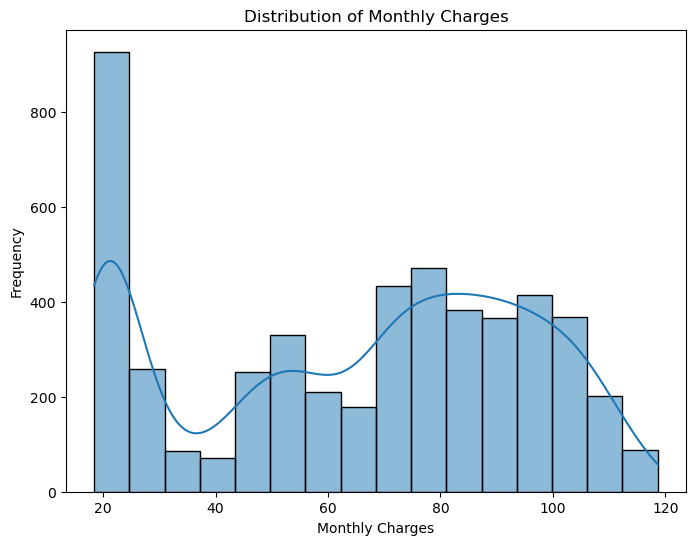

In [52]:
# A histogram for the distribution of monthly charges
plt.figure(figsize=(8, 6))
sns.histplot(train_df['MonthlyCharges'], kde=True)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

# Bivariate Analysis

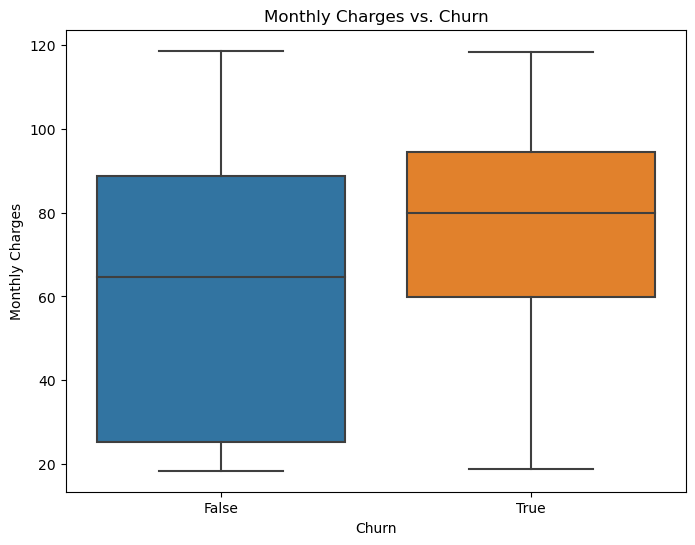

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

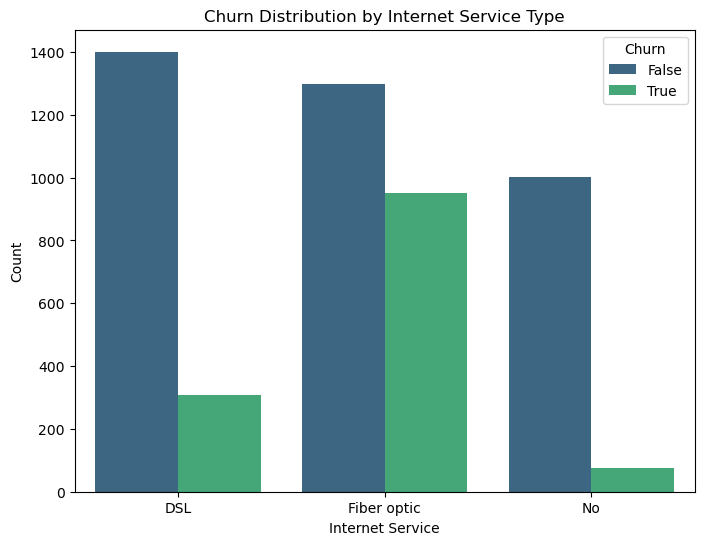

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Distribution by Internet Service Type')
plt.legend(title='Churn', loc='upper right')
plt.show()

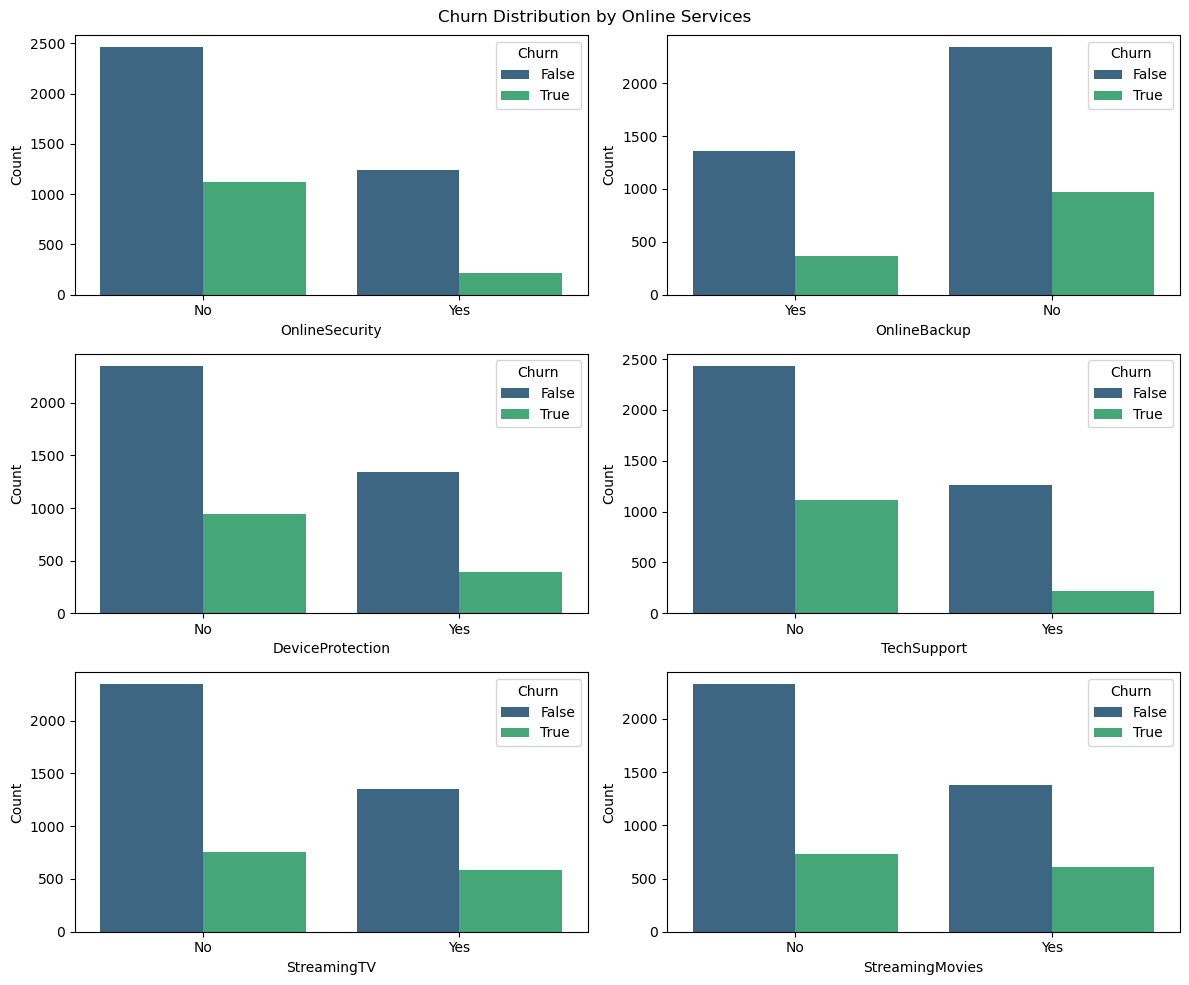

In [55]:
plt.figure(figsize=(12, 10))
for i, service in enumerate(services):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=service, hue='Churn', data=train_df, palette='viridis')
    plt.xlabel(service)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
plt.suptitle('Churn Distribution by Online Services')
plt.tight_layout()
plt.show()

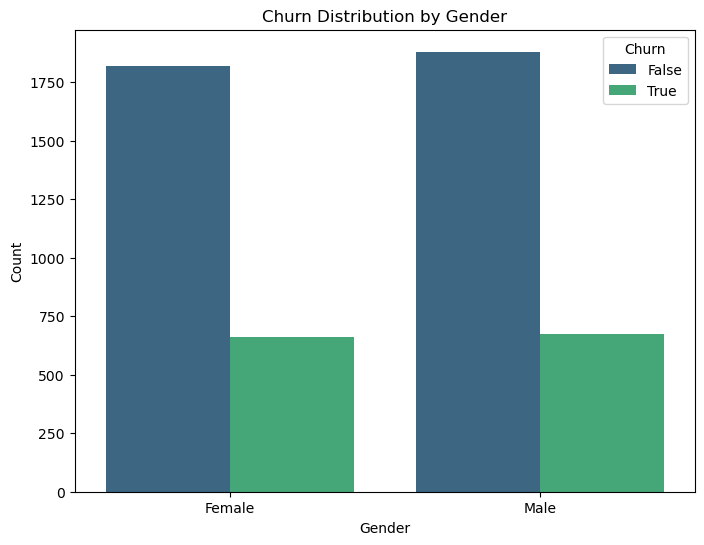

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=train_df, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender')
plt.legend(title='Churn', loc='upper right')
plt.show()


In [75]:
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)

    # loop through each column name to create a subplot
    for column, ax in zip(columns_to_plot, axes.flatten()):
        # calculate the percentage of observations of the response variable for each group of the independent variable
        prop_by_independent = pd.crosstab(train_df[column], train_df['Churn']).apply(lambda x: x / x.sum() * 100,
                                                                                     axis=1)

        # plot the stacked bar chart using the 'viridis' colormap
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, colormap='viridis')

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column, fontsize=8, loc='left')
        ax.tick_params(rotation='auto')

        # remove the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)


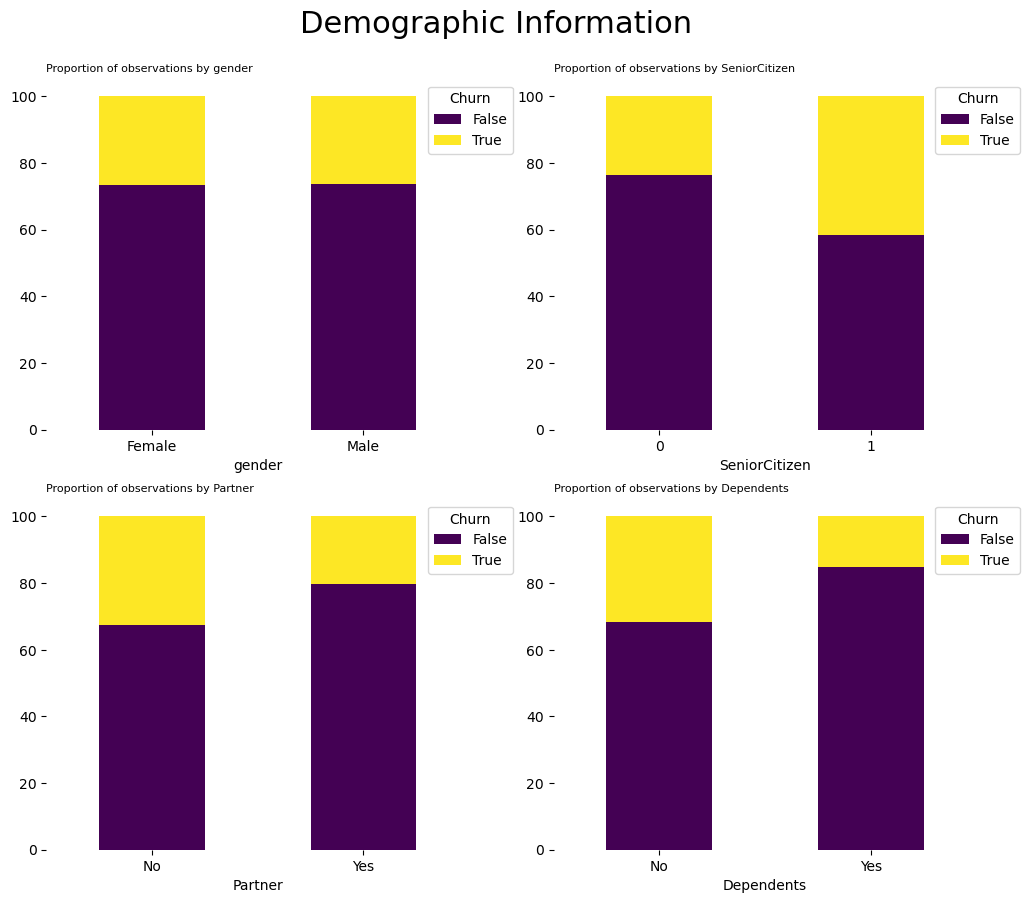

In [76]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')